# Comparing sun positions with INSEL and PVLIB

In [1]:
LATITUDE = 48.77
LONGITUDE = 9.18

# NOTE : Time should be localized, but without daylight saving time.
# NOTE : 'Europe/Berlin' switches between UTC+01:00 and UTC+02:00 and leads to missing or overlapping hours
# NOTE : Etc/GMT sign convention is the same as in INSEL and the opposite of UTC or GMT.
TIMEZONE = 'Etc/GMT-1'

In [2]:
from pvlib import solarposition

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Creates an array of times with every hour in 2018, localized in TIMEZONE.
assert 'Etc/GMT' in TIMEZONE, "TIMEZONE should be expressed in 'Etc/GMT'. E.g. 'Etc/GMT-1' for Germany"
times = pd.DatetimeIndex(start='2018-01-01 00:00', freq='1h', periods=8760).tz_localize(tz=TIMEZONE)

In [4]:
# see https://wholmgren-pvlib-python-new.readthedocs.io/en/doc-reorg2/generated/solarposition/pvlib.solarposition.get_solarposition.html
df = solarposition.get_solarposition(times, LATITUDE, LONGITUDE)

In [5]:
# Removes unneeded columns and reorder azimuth/elevation
df = df[['azimuth', 'apparent_elevation']]

In [6]:
# Renames columns
df = df.rename(index=str, columns={"azimuth": "pvlib_azimuth", "apparent_elevation": "pvlib_elevation"})

In [7]:
import insel
import numpy as np

In [8]:
# INSEL timezone convention is not only backwards, it has to be positive
insel_timezone = int(TIMEZONE.replace('Etc/GMT', '')) % 24

insel_sunposition = np.array(
    insel.template('solarposition',
                   latitude = LATITUDE,
                   insel_longitude = -LONGITUDE,
                   insel_timezone = insel_timezone
                  )
)

In [9]:
df['insel_azimuth'] = insel_sunposition[:,0]

In [10]:
df['insel_elevation']= insel_sunposition[:,1]

In [11]:
# First values
df[:10]

,pvlib_azimuth,pvlib_elevation,insel_azimuth,insel_elevation
2018-01-01 00:00:00+01:00,346.076395,-63.720786,346.270416,-63.211327
2018-01-01 01:00:00+01:00,17.371196,-63.415261,17.603943,-62.871685
2018-01-01 02:00:00+01:00,43.983996,-58.323573,44.193767,-57.748402
2018-01-01 03:00:00+01:00,63.448283,-50.340282,63.623280,-49.745621
2018-01-01 04:00:00+01:00,78.086917,-41.015294,78.238365,-40.410675
2018-01-01 05:00:00+01:00,90.129806,-31.197786,90.269074,-30.589607
2018-01-01 06:00:00+01:00,100.960399,-21.374411,101.095001,-20.767532
2018-01-01 07:00:00+01:00,111.438938,-11.894709,111.574944,-11.293615
2018-01-01 08:00:00+01:00,122.156167,-3.080211,122.297745,-2.489618
2018-01-01 09:00:00+01:00,133.546751,4.888582,133.696442,4.903856


In [12]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
df['insel_azimuth'].corr(df['pvlib_azimuth'])

0.99999819939567569

In [13]:
df['insel_elevation'].corr(df['pvlib_elevation'])

0.99995729423232738

In [14]:
import matplotlib.pyplot as plt

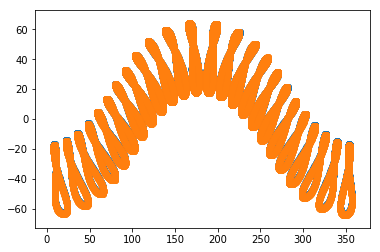

In [15]:
plt.scatter(df['insel_azimuth'], df['insel_elevation'])
plt.scatter(df['pvlib_azimuth'], df['pvlib_elevation'])
plt.show()